In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt


In [59]:
path = '/content/data.txt'

data = pd.read_csv(path, header=None, 
                   names=['Test 1', 'Test 2', 'Accepted'])


In [60]:
print('data = ')
print(data.head(5) )
print('................................................')
print('data.describe = ')
print(data.describe())

data = 
     Test 1   Test 2  Accepted
0  0.051267  0.69956         1
1 -0.092742  0.68494         1
2 -0.213710  0.69225         1
3 -0.375000  0.50219         1
4 -0.513250  0.46564         1
................................................
data.describe = 
           Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646562    1.000000
max      1.070900    1.108900    1.000000


In [61]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]


Text(0, 0.5, 'Test 2 Score')

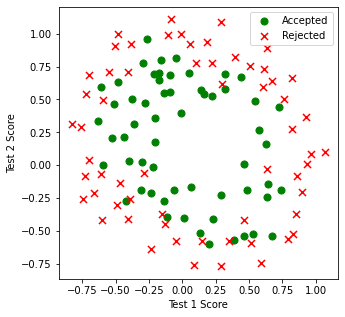

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test 1'], positive['Test 2'],
           s=50, c='g', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'],
           s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [63]:
x1 = data['Test 1']
x2 = data['Test 2']

In [64]:
data.insert(3, 'Ones', 1)   # adding x0 

print('data \n' , data.head(5))

data 
      Test 1   Test 2  Accepted  Ones
0  0.051267  0.69956         1     1
1 -0.092742  0.68494         1     1
2 -0.213710  0.69225         1     1
3 -0.375000  0.50219         1     1
4 -0.513250  0.46564         1     1


In [65]:
degree = 5


In [66]:
# Polynomial Function
for i in range(1, degree): # 1,2,3,4
    for j in range(0, i):  # 0 , 1 , 2 ,2
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j) # i=3 , j=2


In [67]:
data.drop('Test 1', axis=1, inplace=True)
data.drop('Test 2', axis=1, inplace=True)

print('data \n' , data.head(5))

data 
    Accepted  Ones       F10       F20  ...       F40       F41       F42       F43
0         1     1  0.051267  0.002628  ...  0.000007  0.000094  0.001286  0.017551
1         1     1 -0.092742  0.008601  ...  0.000074 -0.000546  0.004035 -0.029801
2         1     1 -0.213710  0.045672  ...  0.002086 -0.006757  0.021886 -0.070895
3         1     1 -0.375000  0.140625  ...  0.019775 -0.026483  0.035465 -0.047494
4         1     1 -0.513250  0.263426  ...  0.069393 -0.062956  0.057116 -0.051818

[5 rows x 12 columns]


In [68]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [70]:
def costReg(theta, X, y, lr ):
    
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    
    reg = (lr / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
     
    return np.sum(first - second) / (len(X)) + reg



In [71]:
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] =(np.sum(term)/len(X))+((learningRate/len(X))*theta[:,i])
    
    return grad

In [72]:
# set X and y (remember from above that we moved the label to column 0)
cols = data.shape[1]
print('cols = ' , cols)

cols =  12


In [73]:
X2 = data.iloc[:,1:cols]

y2 = data.iloc[:,0:1]


In [74]:
# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(X2.shape[1])

In [77]:
learningRate = 0.001
rcost = costReg(theta2, X2, y2, learningRate)
print('regularized cost = ' , rcost)


regularized cost =  0.6931471805599454


In [78]:
result = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg,
                      args=(X2, y2, learningRate))
print( 'result = ' , result )

result =  (array([ 0.09572584,  0.07567703, -0.29235584, -0.18331214,  0.09737016,
       -0.03281042, -0.15411369, -0.21744134,  0.00977285, -0.2520869 ,
       -0.01853112]), 88, 1)


In [79]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]


In [80]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


accuracy = 80%
